# CAPSTONE PROJECT


### Summary:

For the wine tasting problem, I have dealth with multicolinearity through PCA and have trained Logistic regression, Random-forest and SVM.
I have also run hyperparameter tuning with k-fold cross validation.

In the end, class imbalance issue is addressed using oversampling of minority classes and undersampling of majority classes. It yielded excellent results.

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [22]:
#reading the data

df_entire = pd.read_csv('QualityPrediction.csv')
print(df_entire.shape)
df_entire.head(n=10)

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


## 1. Preprocessing & Exploratory data analysis
1. Treatment of missing values
2. Data format Handling
3. Data visualization
4. Treatment of outliers

### 1.1 Treatment of missing values

In [23]:
#percentage of missing values in each column

(df_entire.isnull().sum()/df_entire.isnull().count()).sort_values(ascending=False)


quality                 0.0
alcohol                 0.0
sulphates               0.0
pH                      0.0
density                 0.0
total sulfur dioxide    0.0
free sulfur dioxide     0.0
chlorides               0.0
residual sugar          0.0
citric acid             0.0
volatile acidity        0.0
fixed acidity           0.0
dtype: float64

#### Inference: There are no missing values in the data

### 1.2 Correlation coefficient measure

<AxesSubplot:>

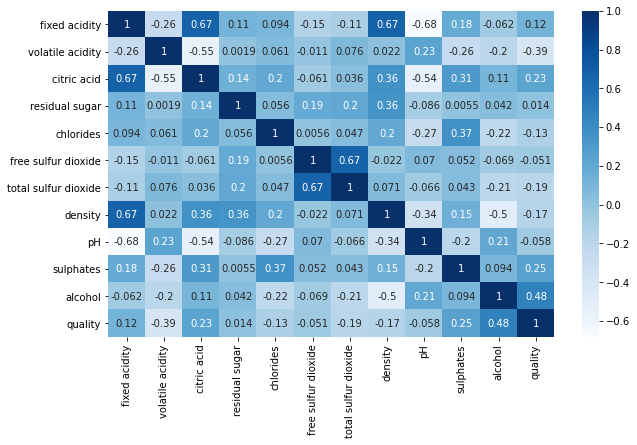

In [24]:
corr= df_entire.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='Blues', annot=True)

### From the Correlation heatmap it is apparent that features have low-to-medium correlation. We will perform PCA little further before random forest classifier to handle multi-colinearity.

### 1.3 Data format handling

In [25]:
df_entire.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

#### No Data format handling required.

### 1.4 Data Visualization

In [26]:
df_entire.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

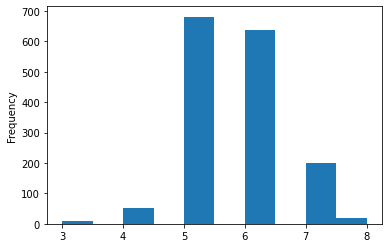

In [27]:
df_entire['quality'].plot.hist()

## Classes are imbalanced !

In [108]:
####

<AxesSubplot:xlabel='quality'>

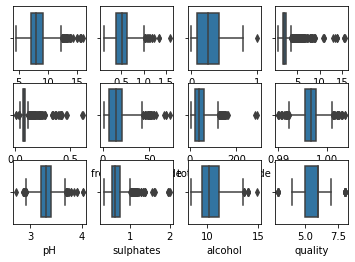

In [28]:
#sns.boxplot(x="variable", y="value", data=pd.melt(df_entire))
#warnings.filterwarnings('ignore')

f, axes = plt.subplots(3,4)
sns.boxplot(df_entire['fixed acidity'], ax=axes[0,0])
sns.boxplot(df_entire['volatile acidity'], ax=axes[0,1])
sns.boxplot(df_entire['citric acid'], ax=axes[0,2])
sns.boxplot(df_entire['residual sugar'], ax=axes[0,3])
sns.boxplot(df_entire['chlorides'], ax=axes[1,0])
sns.boxplot(df_entire['free sulfur dioxide'], ax=axes[1,1])
sns.boxplot(df_entire['total sulfur dioxide'], ax=axes[1,2])
sns.boxplot(df_entire['density'], ax=axes[1,3])
sns.boxplot(df_entire['pH'], ax=axes[2,0])
sns.boxplot(df_entire['sulphates'], ax=axes[2,1])
sns.boxplot(df_entire['alcohol'], ax=axes[2,2])
sns.boxplot(df_entire['quality'], ax=axes[2,3])

In [29]:
df_X = df_entire.drop(columns=['quality'])
df_Y = df_entire[['quality']]
df_X, df_Y

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.4             0.700         0.00             1.9      0.076   
 1               7.8             0.880         0.00             2.6      0.098   
 2               7.8             0.760         0.04             2.3      0.092   
 3              11.2             0.280         0.56             1.9      0.075   
 4               7.4             0.700         0.00             1.9      0.076   
 ...             ...               ...          ...             ...        ...   
 1594            6.2             0.600         0.08             2.0      0.090   
 1595            5.9             0.550         0.10             2.2      0.062   
 1596            6.3             0.510         0.13             2.3      0.076   
 1597            5.9             0.645         0.12             2.0      0.075   
 1598            6.0             0.310         0.47             3.6      0.067   
 
       free su

In [30]:
Q1 = df_X.quantile(0.25)
Q3 = df_X.quantile(0.75)
IQR = Q3 - Q1
lcut = Q1 - 1.5*IQR
rcut = Q3 + 1.5*IQR
L_columns = list(df_X.columns)

for col in L_columns:
    df_X[col].loc[df_X[col] < lcut[col]] = lcut[col] #np.median(df_X[col])
    df_X[col].loc[df_X[col] > rcut[col]] = rcut[col] #np.median(df_X[col])

<AxesSubplot:xlabel='alcohol'>

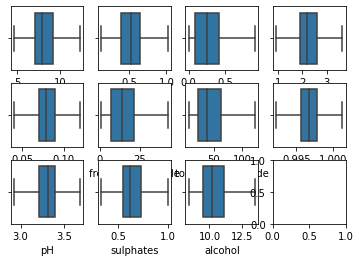

In [31]:
f, axes = plt.subplots(3,4)
sns.boxplot(df_X['fixed acidity'], ax=axes[0,0])
sns.boxplot(df_X['volatile acidity'], ax=axes[0,1])
sns.boxplot(df_X['citric acid'], ax=axes[0,2])
sns.boxplot(df_X['residual sugar'], ax=axes[0,3])
sns.boxplot(df_X['chlorides'], ax=axes[1,0])
sns.boxplot(df_X['free sulfur dioxide'], ax=axes[1,1])
sns.boxplot(df_X['total sulfur dioxide'], ax=axes[1,2])
sns.boxplot(df_X['density'], ax=axes[1,3])
sns.boxplot(df_X['pH'], ax=axes[2,0])
sns.boxplot(df_X['sulphates'], ax=axes[2,1])
sns.boxplot(df_X['alcohol'], ax=axes[2,2])

## 2. Modeling

1. Train-Test split
2. Scaling
3. Applying Logistic Regression
4. Applying Random-Forest Classifier
5. Applying SVM Classifier

### 2.1 Train-Test split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
df_X_revised = df_X.drop(columns=['pH','residual sugar', 'free sulfur dioxide']) #, 'fixed acidity', 'citric acid', 'chlorides', 'density', 'total sulfur dioxide'])

In [34]:
x_train_unscaled, x_test_unscaled, y_train, y_test = train_test_split(df_X_revised, df_Y, test_size=0.4, random_state=111, stratify=df_Y)

## 2.2 Scaling

In [35]:
# Robust Scaler
## (x-Q1)/(Q3-Q1)
## Fit for data with outliers

from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
x_train = robust_scaler.fit_transform(x_train_unscaled)
#df_X = pd.DataFrame(x_train, columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])
#df_X.plot.kde()

In [36]:
x_test = robust_scaler.transform(x_test_unscaled)

### 2.2 Applying Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, plot_confusion_matrix, classification_report

In [38]:
logReg = LogisticRegression(random_state=111)
logReg.fit(x_train, y_train)

LogisticRegression(random_state=111)

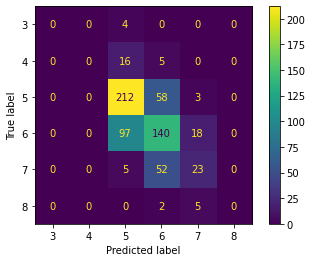

In [39]:
#prediction and evaluation
y_pred = logReg.predict(x_test)
plot_confusion_matrix(logReg, x_test, y_test)
plt.show()

In [40]:
#accuracy score

print("accuracy score for test data", logReg.score(x_test, y_test))
print("accuracy score for training data", logReg.score(x_train, y_train))

accuracy score for test data 0.5859375
accuracy score for training data 0.5954118873826904


In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        21
           5       0.63      0.78      0.70       273
           6       0.54      0.55      0.55       255
           7       0.47      0.29      0.36        80
           8       0.00      0.00      0.00         7

    accuracy                           0.59       640
   macro avg       0.27      0.27      0.27       640
weighted avg       0.55      0.59      0.56       640



#### Inference: Using Logistic regression that the difference between accuracies of training data and test data is about 5% indicating no overfitting 

## Performing PCA to handle multicolinearity. 
### Principal components are used as features to train Random Forest.

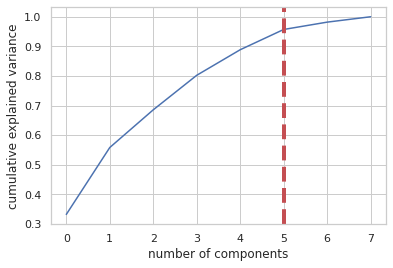

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.331873,0.331873
1,0.557983,0.226110
2,0.685424,0.127441
3,0.802129,0.116706
4,0.888526,0.086397
5,0.956985,0.068459
6,0.981786,0.024801
7,1.000000,0.018214


In [42]:
#Applying PCA and apt number of principal components for the dataset.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
pca_test = PCA(n_components=8)
pca_test.fit(x_train)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=5, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))


### It can be seen from the PCA that with 5 components about 95% of the variance is covered. We will now use n=5 to get principle components for further training with Random forest classifier.

In [43]:
pca = PCA(n_components=5)
pca.fit(x_train)

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

### 2.3 Applying Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

In [84]:
rf = RandomForestClassifier(random_state=111, class_weight=None)
#rf.fit(x_train, y_train)

In [94]:
#hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

criterion = ['gini']
# Number of trees in random forest
n_estimators = [100]

# Number of features to consider at every split
max_features = range(2,5)

# Maximum number of levels in tree
max_depth = range(7,10)
#max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = range(2,6)

# Minimum number of samples required at each leaf node
min_samples_leaf = [2]

# Method of selecting samples for training each tree
bootstrap = [True]

oob_score = [False]

# Create the random grid
random_grid = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'oob_score': oob_score}
print(random_grid)

{'criterion': ['gini'], 'n_estimators': [100], 'max_features': range(2, 5), 'max_depth': range(7, 10), 'min_samples_split': range(2, 6), 'min_samples_leaf': [2], 'bootstrap': [True], 'oob_score': [False]}


In [95]:
#rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=10, n_jobs=-1)
rf_random = GridSearchCV(estimator=rf, param_grid=random_grid, cv=10, n_jobs=-1, verbose=2, scoring='f1_weighted', return_train_score=True)
rf_random.fit(x_train_pca, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   40.5s finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=111),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini'],
                         'max_depth': range(7, 10), 'max_features': range(2, 5),
                         'min_samples_leaf': [2],
                         'min_samples_split': range(2, 6),
                         'n_estimators': [100], 'oob_score': [False]},
             return_train_score=True, scoring='f1_weighted', verbose=2)

<BarContainer object of 5 artists>

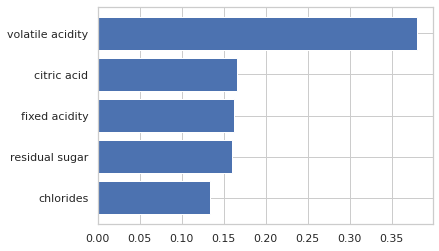

In [96]:
sorted_idx = rf_random.best_estimator_.feature_importances_.argsort()
plt.barh(df_X.columns[sorted_idx],rf_random.best_estimator_.feature_importances_[sorted_idx])

In [97]:
rf_random.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100,
 'oob_score': False}

In [98]:
print("best model score on training data", rf_random.best_estimator_.score(x_train_pca, y_train))
print("best model score on test data: ", rf_random.best_estimator_.score(x_test_pca, y_test))

best model score on training data 0.8196037539103233
best model score on test data:  0.621875


In [68]:
#best model
rfc_best = RandomForestClassifier(random_state=11, max_depth=8, max_features=2,
                                  min_samples_leaf=2, min_samples_split=2, bootstrap=True)
rfc_best.fit(x_train_pca, y_train)
print("Best RFC accuracy score on test data: ",rfc_best.score(x_test_pca, y_test))
print("Best RFC accuracy score on training data: ",rfc_best.score(x_train_pca, y_train))
print("Best RFC hyperparameters: ", rfc_best.get_params())

Best RFC accuracy score on test data:  0.603125
Best RFC accuracy score on training data:  0.8300312825860271
Best RFC hyperparameters:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': 2, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 11, 'verbose': 0, 'warm_start': False}


In [65]:
#prediction
#y_pred_rf = rf_random.best_estimator_.predict(x_test)

In [99]:
#base model
rfc = RandomForestClassifier(random_state=11)
rfc.fit(x_train_pca, y_train)
print("default RFC accuracy score on test data: ",rfc.score(x_test_pca, y_test))
print("default RFC accuracy score on training data: ",rfc.score(x_train_pca, y_train))
print("default RFC hyperparameters: ", rfc.get_params())

default RFC accuracy score on test data:  0.6375
default RFC accuracy score on training data:  1.0
default RFC hyperparameters:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 11, 'verbose': 0, 'warm_start': False}


In [67]:
#print(classification_report(y_test, y_pred_rf))

#### Inference: Using RF classifier with PCA and with hyperparam tuning, the best accuracy obtained on test data is 60%. Notably, there is about 23% difference b/w accuracy score of test and training data indicating high variance.

#### Also note that with baseline Random Forest model, the testing and training accuracies are respectively 63.75% and 100%. This indicates overfitting or high-variance.

### 2.4 Applying SVM Classifier

In [661]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

#pca = PCA(n_components=5, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
#model = make_pipeline(pca, svc)
model = make_pipeline(svc)

In [662]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 1.0]}
grid = GridSearchCV(model, param_grid)

%timeit grid.fit(x_train, y_train)
print(grid.best_params_)

8.37 s ± 345 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
{'svc__C': 10, 'svc__gamma': 1.0}


In [663]:
#prediction
model = grid.best_estimator_
y_pred_svc = model.predict(x_test)

In [664]:
print("accuracy score for test data: ", model.score(x_test, y_test))
print("accuracy score for training data: ", model.score(x_train, y_train))

accuracy score for test data:  0.6125
accuracy score for training data:  0.9601250977326036


In [665]:
print("classification report: ", classification_report(y_test, y_pred_svc))

classification report:                precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.09      0.09      0.09        11
           5       0.69      0.71      0.70       136
           6       0.60      0.59      0.60       128
           7       0.52      0.55      0.54        40
           8       0.00      0.00      0.00         3

    accuracy                           0.61       320
   macro avg       0.32      0.32      0.32       320
weighted avg       0.60      0.61      0.61       320



#### Inference: Using SVM classifier, the best accuracy obtained on the test data is about 57%. Notably, there is about 33% difference between the accuracy of test and training data indicating higher variance.

#### Various models have been tried but the test accuracy is not satisfactory. Even after hyperparameter tuning with k-fold cross-validation, the test accuracy is similar to that of baseline model. This is perhaps due to the severe imbalance in classes.

# Addressing class imbalance issue

<AxesSubplot:xlabel='quality', ylabel='count'>

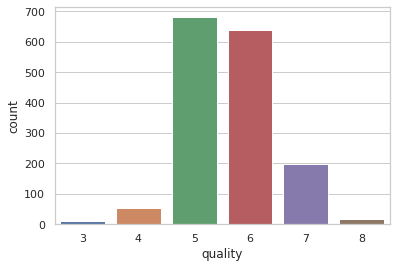

In [109]:
#Class Imbalance issue
df_Y_copy = df_Y.copy()
sns.countplot(x=df_Y_copy['quality'])

In [110]:
df_3 = df_entire[df_entire.quality==3]     # MINORITY          
df_4 = df_entire[df_entire.quality==4]     # MINORITY          
df_5 = df_entire[df_entire.quality==5]     # MAJORITY
df_6 = df_entire[df_entire.quality==6]     # MAJORITY
df_7 = df_entire[df_entire.quality==7]     # MINORITY
df_8 = df_entire[df_entire.quality==8]     # MINORITY

#We had already established it earlier that except quality 5 and 6, all the others are minority!

In [111]:
# Oversample MINORITY Class to make balance data :
from sklearn.utils import resample

df_3_upsampled = resample(df_3, replace=True, n_samples=600, random_state=12) 
df_4_upsampled = resample(df_4, replace=True, n_samples=600, random_state=12) 
df_7_upsampled = resample(df_7, replace=True, n_samples=600, random_state=12) 
df_8_upsampled = resample(df_8, replace=True, n_samples=600, random_state=12) 

# Decreases the rows of Majority one's to make balance data :
df_5_downsampled = df_entire[df_entire.quality==5].sample(n=600).reset_index(drop=True)
df_6_downsampled = df_entire[df_entire.quality==6].sample(n=600).reset_index(drop=True)

In [112]:
# Combine downsampled majority class with upsampled minority class
Balanced_df = pd.concat([df_3_upsampled, df_4_upsampled, df_7_upsampled, 
                         df_8_upsampled, df_5_downsampled, df_6_downsampled]).reset_index(drop=True)


# Display new class counts
Balanced_df.quality.value_counts()  

7    600
5    600
3    600
8    600
6    600
4    600
Name: quality, dtype: int64

In [113]:
Balanced_df_X = Balanced_df.drop(columns=['quality'])
Balanced_df_y = Balanced_df[['quality']]

Balanced_df_X, Balanced_df_y

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               6.8             0.815         0.00            1.20      0.267   
 1              10.4             0.610         0.49            2.10      0.200   
 2               7.4             1.185         0.00            4.25      0.097   
 3              10.4             0.440         0.42            1.50      0.145   
 4              10.4             0.440         0.42            1.50      0.145   
 ...             ...               ...          ...             ...        ...   
 3595            8.3             0.340         0.40            2.40      0.065   
 3596           10.5             0.360         0.47            2.20      0.074   
 3597            8.0             0.580         0.16            2.00      0.120   
 3598           11.9             0.570         0.50            2.60      0.082   
 3599            7.4             0.290         0.38            1.70      0.062   
 
       free su

In [152]:
xb_train, xb_test, yb_train, yb_test = train_test_split(Balanced_df_X, Balanced_df_y, test_size = 0.2, random_state=100, stratify=Balanced_df_y)

In [156]:
#best model
rfc_balanced = RandomForestClassifier(random_state=11, max_depth=None, max_features=2,
                                  min_samples_leaf=1, min_samples_split=3, bootstrap=True)
rfc_balanced.fit(xb_train, yb_train)
print("Balanced RFC accuracy score on test data: ",rfc_balanced.score(xb_test, yb_test))
print("Balanced RFC accuracy score on training data: ",rfc_balanced.score(xb_train, yb_train))
print("Balanced RFC hyperparameters: ", rfc_balanced.get_params())

Balanced RFC accuracy score on test data:  0.9125
Balanced RFC accuracy score on training data:  1.0
Balanced RFC hyperparameters:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 11, 'verbose': 0, 'warm_start': False}


#### Conclusion: The dataset suffered from class imbalance issue. Once the classes are made balanced then even the base random classifier model yielded excellent results. With max_features=2, the accuracy slightly increased further.